# Libraries with fixed versions and data loading

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
!pip install shap==0.41.0
import shap
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import metrics

You should consider upgrading via the 'C:\Users\Utente\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# # Enable export of plotly interactivity in html export
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode(connected = True)

To load the data, you can simply put it on Google Drive and read it in a few lines of code (there are multiple other ways to do it).

For speed, we can load only the provided 26 columns (1 target, 1 ID and 24 features).

# **[#1] Interesting variables**

In [4]:
ap_train = pd.read_csv("C:/Users/Utente/Desktop/application_train.csv",
                    usecols =  ['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                                'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                                'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE',
                                'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
                                'EXT_SOURCE_2', 'EXT_SOURCE_3'])
print(f"Application train dataset shape: {ap_train.shape}")

Application train dataset shape: (307511, 26)


In [5]:
ap_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.018801,-9461,-637,-3648.0,-2120,NaN,Laborers,0.083037,0.262949,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.003541,-16765,-1188,-1186.0,-291,NaN,Core staff,0.311267,0.622246,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.010032,-19046,-225,-4260.0,-2531,26.0,Laborers,NaN,0.555912,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.008019,-19005,-3039,-9833.0,-2437,NaN,Laborers,NaN,0.650442,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.028663,-19932,-3038,-4311.0,-3458,NaN,Core staff,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.032561,-9327,-236,-8456.0,-1982,NaN,Sales staff,0.145570,0.681632,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.025164,-20775,365243,-4388.0,-4090,NaN,NaN,NaN,0.115992,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.005002,-14966,-7921,-6737.0,-5150,NaN,Managers,0.744026,0.535722,0.218859
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.005313,-11961,-4786,-2562.0,-931,NaN,Laborers,NaN,0.514163,0.661024


For simplicity, we'll create a AGE (in years) variable from DAYS_BIRTH (in days).

In [6]:
ap_train['DAYS_BIRTH'] = -round(ap_train['DAYS_BIRTH']/365)

In [8]:
interesting_v = pd.read_csv('application_train.csv',
                    usecols =  ['TARGET', 'SK_ID_CURR',
                         'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                                'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
                                'EXT_SOURCE_2', 'EXT_SOURCE_3'])
print(f"Application train dataset shape: {interesting_v.shape}")

Application train dataset shape: (307511, 16)


In [9]:
interesting_v ['DAYS_BIRTH'] = -round(interesting_v ['DAYS_BIRTH']/365)

In [10]:
interesting_v 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,26.0,-637,-3648.0,-2120,NaN,0.083037,0.262949,0.139376
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,46.0,-1188,-1186.0,-291,NaN,0.311267,0.622246,NaN
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,52.0,-225,-4260.0,-2531,26.0,NaN,0.555912,0.729567
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,-3039,-9833.0,-2437,NaN,NaN,0.650442,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,55.0,-3038,-4311.0,-3458,NaN,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,26.0,-236,-8456.0,-1982,NaN,0.145570,0.681632,NaN
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,57.0,365243,-4388.0,-4090,NaN,NaN,0.115992,NaN
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,41.0,-7921,-6737.0,-5150,NaN,0.744026,0.535722,0.218859
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,33.0,-4786,-2562.0,-931,NaN,NaN,0.514163,0.661024


# **[#2] Interesting variables with respect to target**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
total_tg = ap_train.groupby('CODE_GENDER',as_index = False).CODE_GENDER.size()
total_tg = total_tg.rename(columns={"size": "TARGET"})
total_tg

,CODE_GENDER,TARGET
0,F,202448
1,M,105059
2,XNA,4


In [13]:
loaned_tot = ap_train.groupby(['CODE_GENDER', 'TARGET'],as_index = False).TARGET.size()
loaned_tot

,CODE_GENDER,TARGET,size
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


In [14]:
loaned = loaned_tot.drop([0,2])
notloaned = loaned_tot.drop([1, 3])
loaned

,CODE_GENDER,TARGET,size
1,F,1,14170
3,M,1,10655
4,XNA,0,4


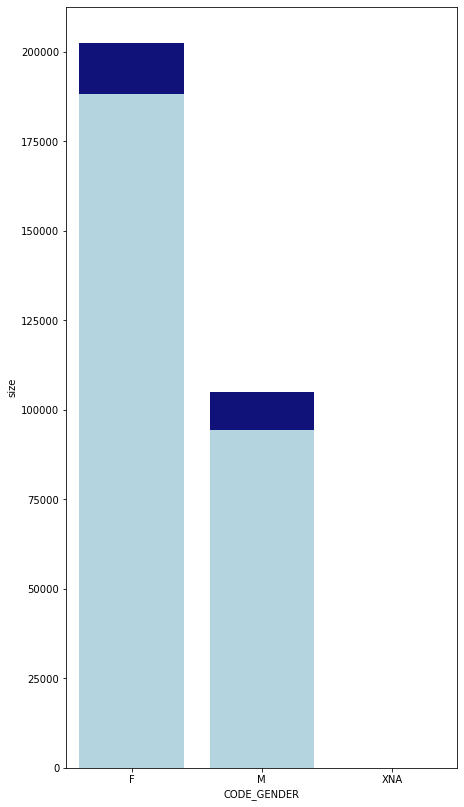

In [15]:
plt.figure(figsize= (7, 14))
bar1 = sns.barplot(x="CODE_GENDER", y="TARGET", data=total_tg, color='darkblue')
bar2 = sns.barplot(x="CODE_GENDER", y="size", data=notloaned, color='lightblue')


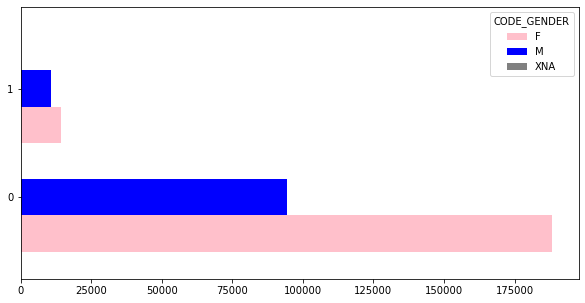

In [16]:
ax=loaned_tot.pivot(index="TARGET", columns="CODE_GENDER", values='size').plot.barh(figsize= (10, 5),
                                                                                color={"F":"pink", "M":"blue", "XNA":"grey"}, 
                                                                               rot=0,
                                                                               xlabel="", 
                                                                                    width=1)

                                                                               

In [17]:
insolvency = {'CODE_GENDER': ['M', 'F'], 'insolvencyrate': [7, 10.52]}
insolvency = pd.DataFrame(insolvency)

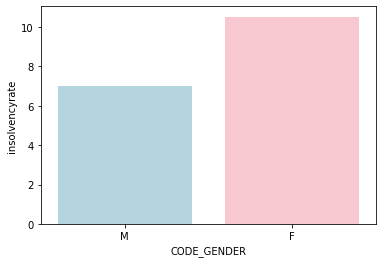

In [18]:
colors= [ 'lightblue', 'pink']
bar3 = sns.barplot(x="CODE_GENDER", y="insolvencyrate", data=insolvency, palette=colors)

In [19]:
import age

In [20]:
bins = [20, 31, 42, 53, 64, 75]
labels = ['20-31', '31-42', '42-53', '53-64', '64-75']
ap_train['AGERANGE'] = pd.cut(ap_train.DAYS_BIRTH, bins, labels = labels,include_lowest = True)

In [21]:
totalage = ap_train.groupby(['AGERANGE'],as_index = False).TARGET.count()
totalage

,AGERANGE,TARGET
0,20-31,56890
1,31-42,91552
2,42-53,78987
3,53-64,69321
4,64-75,10761


In [22]:
age = ap_train.groupby(['AGERANGE', 'TARGET'],as_index = False).TARGET.size()
agenotloan = age.drop([0, 2, 4, 6, 8])

In [23]:
agenotloan

,AGERANGE,TARGET,size
1,20-31,1,6443
3,31-42,1,8279
5,42-53,1,5811
7,53-64,1,3848
9,64-75,1,444


In [24]:
ageloan = age.drop([1, 3, 5, 7, 9])

In [25]:
tot_age_target = pd.merge(ageloan, agenotloan, on=["AGERANGE"])
tot_age_target

,AGERANGE,TARGET_x,size_x,TARGET_y,size_y
0,20-31,0,50447,1,6443
1,31-42,0,83273,1,8279
2,42-53,0,73176,1,5811
3,53-64,0,65473,1,3848
4,64-75,0,10317,1,444


In [26]:
totperc_ageloan = [89, 91, 93, 94, 96]
totperc_agenotloan = [11, 9, 7, 6, 4]
tot_age_target['totperc_ageloan'] = totperc_ageloan
tot_age_target['totperc_agenotloan'] = totperc_agenotloan
tot_age_target

,AGERANGE,TARGET_x,size_x,TARGET_y,size_y,totperc_ageloan,totperc_agenotloan
0,20-31,0,50447,1,6443,89,11
1,31-42,0,83273,1,8279,91,9
2,42-53,0,73176,1,5811,93,7
3,53-64,0,65473,1,3848,94,6
4,64-75,0,10317,1,444,96,4


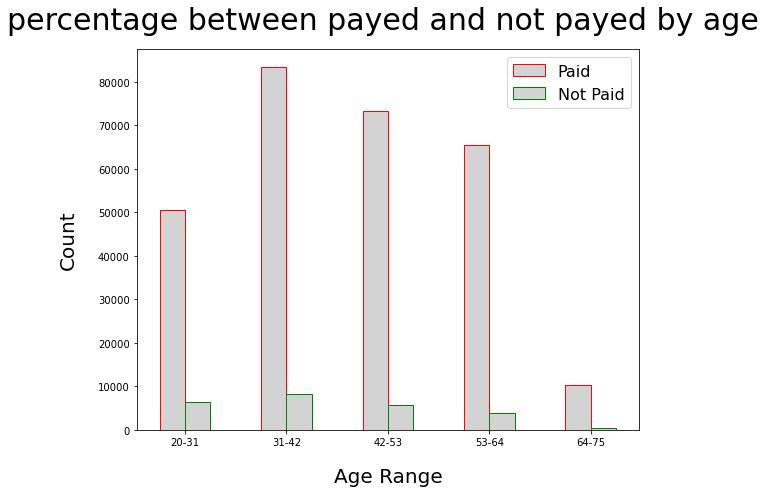

In [27]:
ratio_agepaytotal = tot_age_target["totperc_ageloan"]
ratio_agenotpaytotal = tot_age_target["totperc_agenotloan"]
label = tot_age_target["AGERANGE"]
x = np.arange(len(label))
n=2
r = np.arange(n)
width = 0.25

fig, ax = plt.subplots(1,1, figsize = (9,7))
rects1 = ax.bar(x - width/2,
              tot_age_target['size_x'],
              width = width,
               label = "Paid",
               edgecolor='red',
               color="lightgrey")

rects2 = ax.bar(x + width/2,
              tot_age_target['size_y'],
              width = width,
              label = "Not Paid",
              edgecolor="green",
               color="lightgrey")

ax.set_ylabel("Count",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Age Range",
             fontsize = 20,
             labelpad =20)
ax.set_title("percentage between payed and not payed by age ",
            fontsize = 30,
            pad = 20)

ax.set_xticks(x)
ax.set_xticklabels(label)

ax.legend(
         fontsize = 16,
         title_fontsize = 20)


#for rect,p in zip(rects1, ratio_agepaytotal):
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height+5, str(p)+'%', ha='left', va='bottom', fontsize=12, rotation=45, color='black')

#for rect,p in zip(rects2, ratio_agenotpaytotal):
   # height = rect.get_height()
  #  ax.text(rect.get_x() + rect.get_width()/2, height+5, str(p)+'%', ha='left', va='bottom', fontsize=12, rotation=45, color='black')

plt.show()

Let's prepare the data for a simple ML model.

First of all, feature encoding.

In [28]:
ap_train['CODE_GENDER_M'] = np.select([ap_train['CODE_GENDER'] == 'M', ap_train['CODE_GENDER'] == 'F'], [1, 0], default=np.NaN)
ap_train['FLAG_OWN_CAR'] = np.where(ap_train['FLAG_OWN_CAR'] == 'Y', 1, 0)
ap_train['FLAG_OWN_REALTY'] = np.where(ap_train['FLAG_OWN_REALTY'] == 'Y', 1, 0)
ap_train.drop(columns='CODE_GENDER', inplace=True)

In [29]:
ap_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGERANGE,CODE_GENDER_M
0,100002,1,Cash loans,0,1,0,202500.0,406597.5,24700.5,351000.0,...,-637,-3648.0,-2120,NaN,Laborers,0.083037,0.262949,0.139376,20-31,1.0
1,100003,0,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,-1188,-1186.0,-291,NaN,Core staff,0.311267,0.622246,NaN,42-53,0.0
2,100004,0,Revolving loans,1,1,0,67500.0,135000.0,6750.0,135000.0,...,-225,-4260.0,-2531,26.0,Laborers,NaN,0.555912,0.729567,42-53,1.0
3,100006,0,Cash loans,0,1,0,135000.0,312682.5,29686.5,297000.0,...,-3039,-9833.0,-2437,NaN,Laborers,NaN,0.650442,NaN,42-53,0.0
4,100007,0,Cash loans,0,1,0,121500.0,513000.0,21865.5,513000.0,...,-3038,-4311.0,-3458,NaN,Core staff,NaN,0.322738,NaN,53-64,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,0,0,0,157500.0,254700.0,27558.0,225000.0,...,-236,-8456.0,-1982,NaN,Sales staff,0.145570,0.681632,NaN,20-31,1.0
307507,456252,0,Cash loans,0,1,0,72000.0,269550.0,12001.5,225000.0,...,365243,-4388.0,-4090,NaN,NaN,NaN,0.115992,NaN,53-64,0.0
307508,456253,0,Cash loans,0,1,0,153000.0,677664.0,29979.0,585000.0,...,-7921,-6737.0,-5150,NaN,Managers,0.744026,0.535722,0.218859,31-42,0.0
307509,456254,1,Cash loans,0,1,0,171000.0,370107.0,20205.0,319500.0,...,-4786,-2562.0,-931,NaN,Laborers,NaN,0.514163,0.661024,31-42,0.0


In [30]:
ap_objects = list(ap_train.select_dtypes(include=['object']).columns)
ap_train[ap_objects] = ap_train[ap_objects].astype('category')

Let's separate the target from the rest of the data

In [31]:
ap_train_target = ap_train.pop('TARGET')
print(f"Target dataset shape: {ap_train_target.shape}")

Target dataset shape: (307511,)


Let's split the original dataset in two:

*   80% for the train dataset
*   20% for the test one



In [32]:
df_train, df_test, df_target_train, df_target_test = train_test_split(ap_train, ap_train_target, test_size=0.2, stratify=ap_train_target, random_state=42)

print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

Train dataset shape: (246008, 26)
Test dataset shape: (61503, 26)


# Create a basic ML model and scoring on the test set

I'll train a simple XGBoost model (parameters previously chosen with cross-validation).  

In [33]:
df_train_dmatrix = xgb.DMatrix(df_train.drop(columns='SK_ID_CURR'), df_target_train, enable_categorical=True)

param = {'max_depth':6,
         'eta':.2,
         'subsample':.9,
         'colsample_bytree':.9,
         'scale_pos_weight':10,
         'objective':'binary:logistic',
         'tree_method':'exact'}
xgb_base_model = xgb.train(param, df_train_dmatrix, num_boost_round=50)

Let's score the test set.

In [34]:
df_test_dmatrix = xgb.DMatrix(df_test.drop(columns='SK_ID_CURR'), enable_categorical=True)
xgb_base_test_results = xgb_base_model.predict(df_test_dmatrix)

What are the risk scores (from 0 to 1) of the first 5 customers in the test set? And what's the overall AUC on the test set?

In [35]:
xgb_base_test_results[:20]

array([0.3985119 , 0.29209194, 0.779004  , 0.20188195, 0.4970246 ,
       0.6709157 , 0.09907907, 0.07296119, 0.8493747 , 0.46019366,
       0.11720185, 0.4292545 , 0.10346176, 0.42603463, 0.3213253 ,
       0.29668108, 0.28509343, 0.3900165 , 0.3890925 , 0.2568347 ],
      dtype=float32)

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(df_target_test, xgb_base_test_results, pos_label=1)
metrics.auc(fpr, tpr)

0.7534471659962801

The third customer has a higher risk score (0.796) than the others in the first 5 records.

This simple model has an AUC on the test set around **0.754**, a decent baseline performance.

# **[#3] Evaluating feature importance**

The Frequency (R)/Weight (python) is the percentage representing the relative number of times a particular feature occurs in the trees of the model.

<AxesSubplot:>

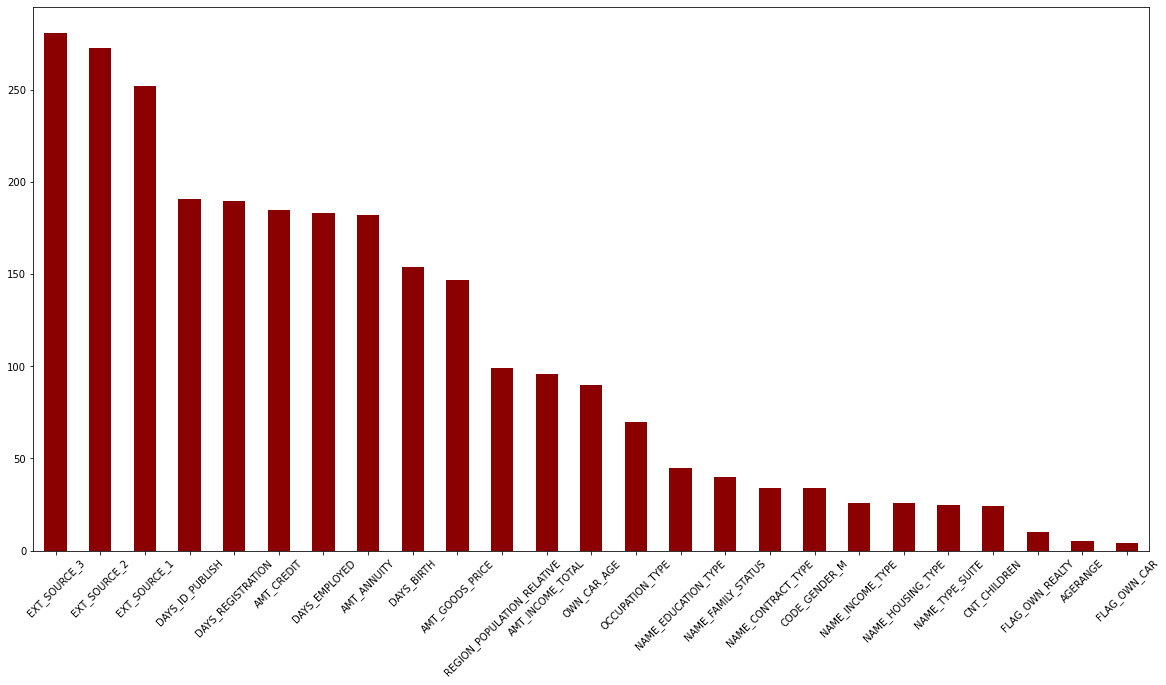

In [37]:
feature_important = xgb_base_model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40,columns="score").plot(kind='bar', figsize = (20,10), legend=False, rot=45, color="darkred") ## plot top 40 features


The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction.

<AxesSubplot:>

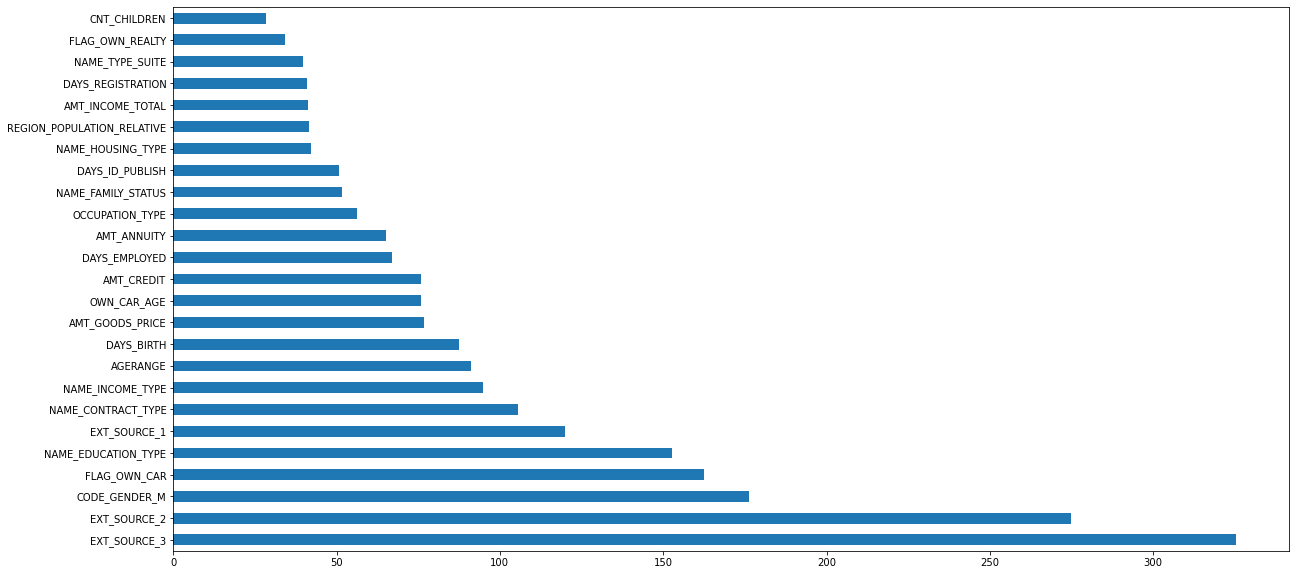

In [38]:
feature_important = xgb_base_model.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10), legend=False) ## plot top 40 features
#data[1].set_color('darkred')

# **[#4] Comparing the model predictions with respect to the original training data**

In [39]:
df_test_dmatrix2 = xgb.DMatrix(df_test.drop(columns='SK_ID_CURR'), df_target_test, enable_categorical=True)
param = {'max_depth':6,
         'eta':.2,
         'subsample':.9,
         'colsample_bytree':.9,
         'scale_pos_weight':10,
         'objective':'binary:logistic',
         'tree_method':'exact'}
xgb_base_model2 = xgb.train(param, df_test_dmatrix2, num_boost_round=50)

In [40]:
xgb_base_test_results2 = xgb_base_model2.predict(df_test_dmatrix2)

In [41]:
xgb_base_test_results2[:20]

array([0.2864746 , 0.18844056, 0.7657154 , 0.16706036, 0.53806484,
       0.6028539 , 0.0938714 , 0.11099046, 0.7847552 , 0.55750036,
       0.18205549, 0.28396034, 0.12313753, 0.23037794, 0.0865855 ,
       0.3478581 , 0.21454662, 0.5577164 , 0.48910514, 0.2837869 ],
      dtype=float32)

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(df_target_test, xgb_base_test_results2, pos_label=1)
metrics.auc(fpr, tpr)

0.8645765004648728

<AxesSubplot:>

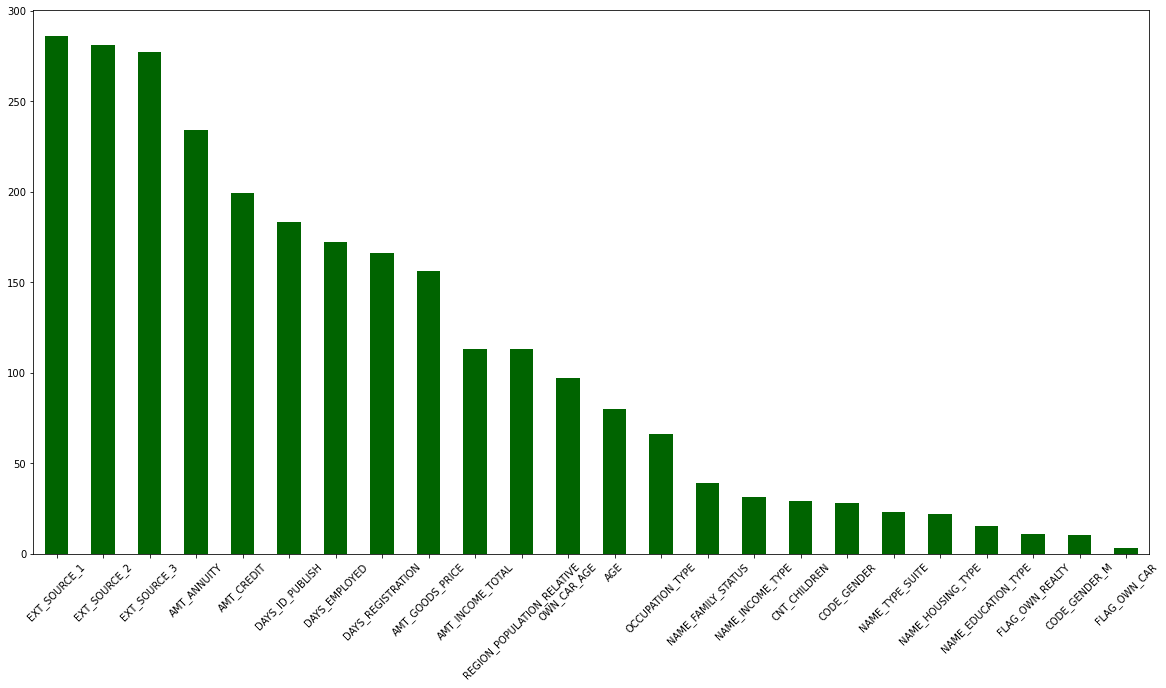

In [60]:
feature_important2 = xgb_base_model2.get_score(importance_type='weight')
keys = list(feature_important2.keys())
values = list(feature_important2.values())

data2 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data2.nlargest(40, columns="score").plot(kind='bar', figsize = (20,10), rot=45, color="darkgreen", legend=False) ## plot top 40 features

# **[#5] Comparison of a few cases, changing just 1 or 2 features**

In [44]:
ap_train3 = pd.read_csv('application_train.csv',
                        usecols=['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                                 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                                 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                 'OCCUPATION_TYPE',
                                 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
                                 'EXT_SOURCE_2', 'EXT_SOURCE_3'])


ap_train3['CODE_GENDER_M'] = np.select([ap_train3['CODE_GENDER'] == 'M', ap_train3['CODE_GENDER'] == 'F'], [1, 0], default=np.NaN)
ap_train3['FLAG_OWN_CAR'] = np.where(ap_train3['FLAG_OWN_CAR'] == 'Y', 1, 0)
ap_train3['FLAG_OWN_REALTY'] = np.where(ap_train3['FLAG_OWN_REALTY'] == 'Y', 1, 0)
ap_train3['NAME_CONTRACT_TYPE'] = np.where(ap_train3['NAME_CONTRACT_TYPE'] == 'Y', 1, 0)

ap_train3['AGE'] = -round(ap_train3['DAYS_BIRTH'] / 365)
ap_train3.drop(columns='DAYS_BIRTH', inplace=True)

ap_train3['NAME_EDUCATION_TYPE'] = np.random.permutation(ap_train3.NAME_EDUCATION_TYPE)
ap_train3['OCCUPATION_TYPE'] = np.random.permutation(ap_train3.OCCUPATION_TYPE)
ap_train3['AGE'] = np.random.permutation(ap_train3.AGE)

ap_objects = list(ap_train3.select_dtypes(include=['object']).columns)
ap_train3[ap_objects] = ap_train3[ap_objects].astype('category')
ap_train_target3 = ap_train3.pop('TARGET')

df_train3, df_test3, df_target_train3, df_target_test3 = train_test_split(
    ap_train3, ap_train_target3, test_size=0.2, stratify=ap_train_target3, random_state=42)



In [45]:
ap_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGERANGE,CODE_GENDER_M
0,100002,Cash loans,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,-637,-3648.0,-2120,NaN,Laborers,0.083037,0.262949,0.139376,20-31,1.0
1,100003,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,-1188,-1186.0,-291,NaN,Core staff,0.311267,0.622246,NaN,42-53,0.0
2,100004,Revolving loans,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,-225,-4260.0,-2531,26.0,Laborers,NaN,0.555912,0.729567,42-53,1.0
3,100006,Cash loans,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,-3039,-9833.0,-2437,NaN,Laborers,NaN,0.650442,NaN,42-53,0.0
4,100007,Cash loans,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,-3038,-4311.0,-3458,NaN,Core staff,NaN,0.322738,NaN,53-64,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,0,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,-236,-8456.0,-1982,NaN,Sales staff,0.145570,0.681632,NaN,20-31,1.0
307507,456252,Cash loans,0,1,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,365243,-4388.0,-4090,NaN,NaN,NaN,0.115992,NaN,53-64,0.0
307508,456253,Cash loans,0,1,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,-7921,-6737.0,-5150,NaN,Managers,0.744026,0.535722,0.218859,31-42,0.0
307509,456254,Cash loans,0,1,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,-4786,-2562.0,-931,NaN,Laborers,NaN,0.514163,0.661024,31-42,0.0


In [46]:
ap_train3

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER_M,AGE
0,100002,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,-637,-3648.0,-2120,NaN,NaN,0.083037,0.262949,0.139376,1.0,65.0
1,100003,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,-1188,-1186.0,-291,NaN,Managers,0.311267,0.622246,NaN,0.0,41.0
2,100004,0,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,-225,-4260.0,-2531,26.0,Laborers,NaN,0.555912,0.729567,1.0,37.0
3,100006,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,-3039,-9833.0,-2437,NaN,Managers,NaN,0.650442,NaN,0.0,39.0
4,100007,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,-3038,-4311.0,-3458,NaN,Drivers,NaN,0.322738,NaN,1.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,M,0,0,0,157500.0,254700.0,27558.0,225000.0,...,-236,-8456.0,-1982,NaN,NaN,0.145570,0.681632,NaN,1.0,50.0
307507,456252,0,F,0,1,0,72000.0,269550.0,12001.5,225000.0,...,365243,-4388.0,-4090,NaN,Laborers,NaN,0.115992,NaN,0.0,47.0
307508,456253,0,F,0,1,0,153000.0,677664.0,29979.0,585000.0,...,-7921,-6737.0,-5150,NaN,Sales staff,0.744026,0.535722,0.218859,0.0,59.0
307509,456254,0,F,0,1,0,171000.0,370107.0,20205.0,319500.0,...,-4786,-2562.0,-931,NaN,NaN,NaN,0.514163,0.661024,0.0,30.0


In [47]:
df_train_dmatrix2 = xgb.DMatrix(df_train3.drop(columns='SK_ID_CURR'), df_target_train3, enable_categorical=True)

param = {'max_depth': 6,
         'eta': .2,
         'subsample': .9,
         'colsample_bytree': .9,
         'scale_pos_weight': 10,
         'objective': 'binary:logistic',
         'tree_method': 'exact'}
xgb_base_model2 = xgb.train(param, df_train_dmatrix2, num_boost_round=50)
df_test_dmatrix2 = xgb.DMatrix(df_test3.drop(columns='SK_ID_CURR'), enable_categorical=True)

In [48]:
xgb_base_test_results2 = xgb_base_model2.predict(df_test_dmatrix2)
xgb_base_test_results2[:20]

array([0.4638713 , 0.2083001 , 0.8484292 , 0.5065742 , 0.5066331 ,
       0.6033848 , 0.12354959, 0.11887005, 0.804513  , 0.35057688,
       0.09396417, 0.6352472 , 0.14985982, 0.32677504, 0.24857509,
       0.33484855, 0.354615  , 0.5193323 , 0.44953033, 0.19051628],
      dtype=float32)

In [49]:
# index 0 no, 4 si, index 6 no(0,14),
fpr, tpr, thresholds = metrics.roc_curve(df_target_test3, xgb_base_test_results2, pos_label=1)
metrics.auc(fpr, tpr)

0.7488850390242754

In [50]:
ap_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGERANGE,CODE_GENDER_M
0,100002,Cash loans,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,-637,-3648.0,-2120,NaN,Laborers,0.083037,0.262949,0.139376,20-31,1.0
1,100003,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,-1188,-1186.0,-291,NaN,Core staff,0.311267,0.622246,NaN,42-53,0.0
2,100004,Revolving loans,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,-225,-4260.0,-2531,26.0,Laborers,NaN,0.555912,0.729567,42-53,1.0
3,100006,Cash loans,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,-3039,-9833.0,-2437,NaN,Laborers,NaN,0.650442,NaN,42-53,0.0
4,100007,Cash loans,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,-3038,-4311.0,-3458,NaN,Core staff,NaN,0.322738,NaN,53-64,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,0,0,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,-236,-8456.0,-1982,NaN,Sales staff,0.145570,0.681632,NaN,20-31,1.0
307507,456252,Cash loans,0,1,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,365243,-4388.0,-4090,NaN,NaN,NaN,0.115992,NaN,53-64,0.0
307508,456253,Cash loans,0,1,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,-7921,-6737.0,-5150,NaN,Managers,0.744026,0.535722,0.218859,31-42,0.0
307509,456254,Cash loans,0,1,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,-4786,-2562.0,-931,NaN,Laborers,NaN,0.514163,0.661024,31-42,0.0


# **[#6] Wrap up: characteristics of the training dataset and how a ML model learns them**

# **[#7] Dropping all our concerns**


In [51]:
ap_train = pd.read_csv('application_train.csv',
                    usecols =  ['TARGET', 'SK_ID_CURR', 'FLAG_OWN_CAR',
                                'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                                'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
                                'EXT_SOURCE_2', 'EXT_SOURCE_3'])



In [52]:
ap_train_target = ap_train.pop('TARGET')
print(f"Target dataset shape: {ap_train_target.shape}")

Target dataset shape: (307511,)


In [53]:
ap_objects = list(ap_train.select_dtypes(include=['object']).columns)
ap_train[ap_objects] = ap_train[ap_objects].astype('category')

In [54]:
df_train, df_test, df_target_train, df_target_test = train_test_split(
    ap_train, ap_train_target, test_size=0.2, stratify=ap_train_target, random_state=42)

print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

Train dataset shape: (246008, 17)
Test dataset shape: (61503, 17)


In [55]:
df_train_dmatrix = xgb.DMatrix(df_train.drop(columns='SK_ID_CURR'), df_target_train, enable_categorical=True)

param = {'max_depth':6,
         'eta':.2,
         'subsample':.9,
         'colsample_bytree':.9,
         'scale_pos_weight':10,
         'objective':'binary:logistic',
         'tree_method':'exact'}
xgb_base_model = xgb.train(param, df_train_dmatrix, num_boost_round=50)

In [56]:
df_test_dmatrix = xgb.DMatrix(df_test.drop(columns='SK_ID_CURR'), enable_categorical=True)
xgb_base_test_results = xgb_base_model.predict(df_test_dmatrix)

In [57]:
xgb_base_test_results[:5]

array([0.4161689 , 0.24968328, 0.6491341 , 0.3023825 , 0.45833546],
      dtype=float32)

# **[#8] A closer look at the performance without features of ethical concern**

# **[#9] Wrapping up again: what happens by just removing the features of concern**

# **[#10] Hints at a possible (but questionable!) solution**